In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gensim
import nltk

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_

True

Using Friends dataset from kaggle (https://www.kaggle.com/datasets)

In [3]:
for file in  os.listdir("./friends"):
  print(file)

S01E01 Monica Gets A Roommate.txt
S01E02 The Sonogram At The End.txt
S01E03 The Thumb.txt
S01E04 George Stephanopoulos.txt
S01E05 The East German Laundry Detergent.txt
S01E06 The Butt.txt
S01E07 The Blackout.txt
S01E08 Nana Dies Twice.txt
S01E09 Underdog Gets Away.txt
S01E10 The Monkey.txt
S01E11 Mrs. Bing.txt
S01E12 The Dozen Lasagnas.txt
S01E13 The Boobies.txt
S01E14 The Candy Hearts.txt
S01E15 The Stoned Guy.txt
S01E16 The Two Parts Part I.txt
S01E17 The Two Parts Part II.txt
S01E18 All The Poker.txt
S01E19 The Monkey Gets Away.txt
S01E20 The Evil Orthodontist.txt
S01E21 The Fake Monica.txt
S01E22 The Ick Factor.txt
S01E23 The Birth.txt
S01E24 Rachel Finds Out.txt
S02E01 Rosss New Girlfriend.txt
S02E02 The Breast Milk.txt
S02E03 Heckles Dies.txt
S02E04 Phoebes Husband.txt
S02E05 Five Steaks And An Eggplant.txt
S02E06 The Baby On The Bus.txt
S02E07 Ross Finds Out.txt
S02E08 The List.txt
S02E09 Phoebes Dad.txt
S02E10 Russ.txt
S02E11 The Lesbian Wedding.txt
S02E12-S02E13 The Superbowl.

In [4]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [5]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    updated = []
    for word in text.split():
        if word in stopwords.words("english"):
            updated.append("")
        else:
            updated.append(word.strip())
    return " ".join(updated).replace("  "," ")

In [6]:
folder_path=r"C:\Users\USER\PycharmProjects\genai-bootcamp\friends"

In [7]:
story=[]
for filename in os.listdir(folder_path):
  file_path=os.path.join(folder_path,filename)
  with open(file_path,encoding='unicode_escape') as f:
    corpus=f.read()
  raw_sent=sent_tokenize(corpus)
  for sent in raw_sent:
    tokens = remove_stopwords(sent)
    fin_tokens = simple_preprocess(tokens)
    story.append(fin_tokens)



In [8]:
custom_model=gensim.models.Word2Vec(window=10,min_count=5,vector_size=150)

In [9]:
custom_model.build_vocab(story)

In [10]:
custom_model.corpus_count

116166

In [11]:
custom_model.min_count

5

In [12]:
custom_model.train(story,total_examples=custom_model.corpus_count, epochs=10)

(4502942, 5910850)

In [13]:
custom_model.wv["king"]

array([ 0.16305466,  0.07127825, -0.05303128,  0.01914204,  0.07067889,
       -0.04232575, -0.05111624,  0.31446123,  0.19725141,  0.2280758 ,
        0.12185106, -0.05032719, -0.15747058,  0.08951443, -0.14234689,
        0.14248574,  0.32689095,  0.0250886 , -0.20365052,  0.07017355,
       -0.36289835,  0.15535825, -0.21135609,  0.07490574,  0.21240048,
        0.00252655, -0.18687005,  0.04647009, -0.25430766, -0.05297199,
        0.19557597, -0.01294515, -0.02160611, -0.00539822, -0.07872714,
       -0.0350606 ,  0.08275443,  0.03240382,  0.27003446, -0.02142488,
        0.11469801,  0.04513166, -0.24155827,  0.1076176 ,  0.00700485,
        0.13440038,  0.11094652,  0.01568482, -0.02648753,  0.12372306,
        0.10997079,  0.10397425,  0.02762051,  0.16439664, -0.15858641,
        0.31218076,  0.15640108,  0.17818601,  0.0254872 ,  0.00784761,
        0.09975122, -0.11964653, -0.15627252,  0.01927962,  0.12282211,
       -0.13406935, -0.24795662, -0.10316299, -0.19985947, -0.08

In [14]:
custom_model.wv["king"].shape

(150,)

In [15]:
custom_model.wv.most_similar("monica")

[('ross', 0.6674255132675171),
 ('joey', 0.654408872127533),
 ('phoebe', 0.5925695300102234),
 ('chandler', 0.5899608135223389),
 ('bedroom', 0.5778990983963013),
 ('rachel', 0.5759347081184387),
 ('richard', 0.5261098742485046),
 ('monicaâ', 0.5200724005699158),
 ('packing', 0.5070817470550537),
 ('hall', 0.505301296710968)]

In [16]:
custom_model.wv.most_similar("friends")


[('kids', 0.710164487361908),
 ('life', 0.6859718561172485),
 ('parents', 0.657699704170227),
 ('family', 0.6547302007675171),
 ('rent', 0.6455469727516174),
 ('yet', 0.6435442566871643),
 ('together', 0.6377971172332764),
 ('forever', 0.6345083117485046),
 ('these', 0.6229115128517151),
 ('babies', 0.6192209124565125)]

In [18]:
custom_model.wv.most_similar('sister')

[('brother', 0.6710079908370972),
 ('grandmother', 0.6673616170883179),
 ('ex', 0.625532865524292),
 ('friend', 0.6164292693138123),
 ('husband', 0.6010915040969849),
 ('has', 0.6006574630737305),
 ('greatest', 0.5981544256210327),
 ('grandfather', 0.5942867994308472),
 ('girl', 0.5933945178985596),
 ('friendâ', 0.583221435546875)]

In [21]:
from sklearn.decomposition import PCA

def create_2d_plot_data(word_vectors, words=None):
    # Get vectors
    if words is None:
        # Use all words
        vectors = word_vectors.vectors
        words = word_vectors.index_to_key
    else:
        # Use specified words
        vectors = np.vstack([word_vectors[word] for word in words])
    
    # Reduce to 2 dimensions
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vectors)
    
    # Create plot data
    plot_data = []
    for i, word in enumerate(words):
        plot_data.append({
            'x': float(coords[i, 0]),
            'y': float(coords[i, 1]),
            'word': word
        })
    
    return plot_data

words = ['rachel', 'monica', 'phoebe', 'joey', 'chandler', 'ross']

# Use this list with the previous plotting code:
plot_data = create_2d_plot_data(custom_model.wv, words)

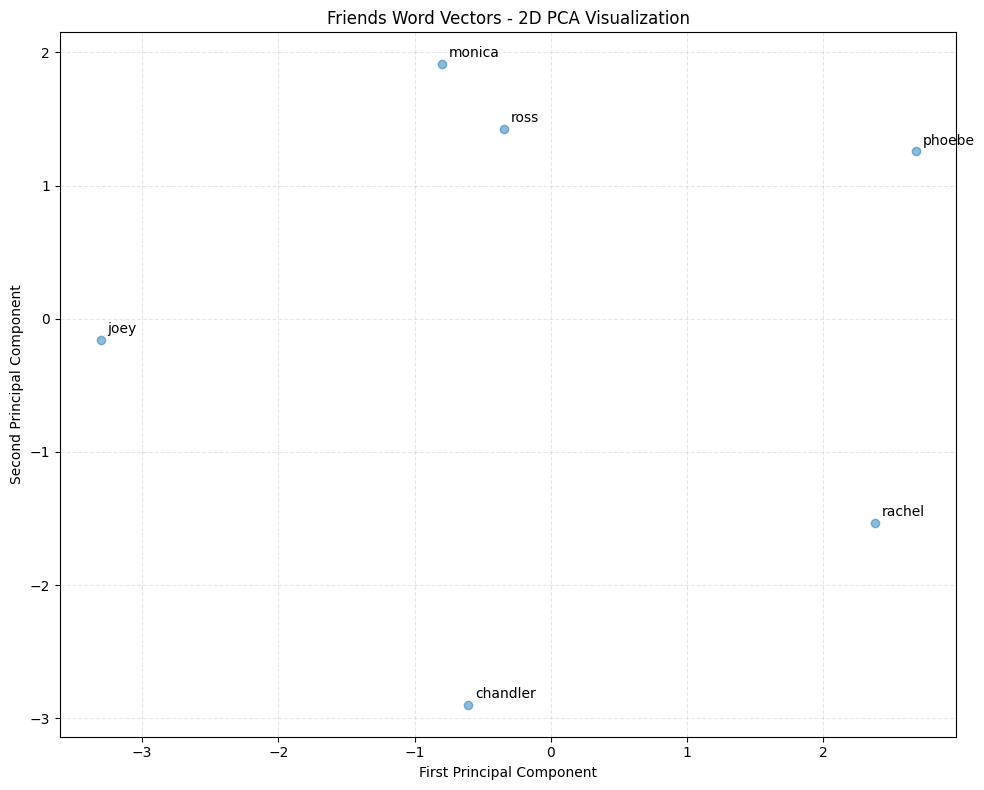

In [23]:

# Create the plot
plt.figure(figsize=(10,8))

# Extract x and y coordinates
x_coords = [point['x'] for point in plot_data]
y_coords = [point['y'] for point in plot_data]
words = [point['word'] for point in plot_data]

# Plot points and labels
plt.scatter(x_coords, y_coords, alpha=0.5)

# Add labels for each point
for i, word in enumerate(words):
    plt.annotate(
        word,
        (x_coords[i], y_coords[i]),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=10
    )

plt.title("Friends Word Vectors - 2D PCA Visualization")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()